In [1]:
import numpy as np

import arviz as az

from matplotlib import pyplot as plt

from cartopy import crs as ccrs

from pandas import read_csv

from pymagglobal.utils import i2lm_l

from scipy.stats import t, norm

from common import z_at, data, n_coeffs, rawData, lmax

/home/arthus/miniforge3/envs/mcmc/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


Rejected 347 outliers.


/home/arthus/Documents/paleokalmag/paleokalmag/data_handling.py:180: UserWarning: Records with indices [   72    73    74    75    76    77    78    79    80    81   108   109
   357   358  1065  1066  1153  2402  2575  2671  2753  2756  2757  3036
  3215  3217  3218  3219  3220  3221  3222  3223  3224  3225  3503  3772
  3988  4047  4235  4415  4504  4530  4531  4655  5172  5326  5434  5496
  5551  5707  5763  5802  5805  5959  6053  6105  6647  6706  6781  6809
  7149  7580  7585  7593  7692  7702  7735  7776  7806  7826  7881  7979
  8067  8296  8327  8427  8464  8510  8670  8708  8752  9224  9653 10002
 10132 10331 10509 10604 10647 11527 11758] contain declination, but not inclination! The errors need special treatment!
To be able to use the provided data, these records have been dropped from the output.


In [2]:
prefix = 'radio'
idata_fname = f'../dat/{prefix}_result.nc'
summary_fname = f'../dat/{prefix}_summary.csv'
coeff_fname = f'../dat/{prefix}_ensemble.npz'

In [3]:
iData = az.from_netcdf(idata_fname)

summary = read_csv(summary_fname)
summary.rename(columns={'Unnamed: 0': 'Name'}, inplace=True)

with np.load(coeff_fname) as fh:
    knots = fh['knots']
    coeffs = fh['coeffs']

In [4]:
ts = z_at[None, None, 3] - \
    np.array(iData.posterior['t_cent']) \
    * np.sqrt(data.errs_T_raw)[None, None, :]

ValueError: operands could not be broadcast together with shapes (4,500,8542) (1,1,8550) 

In [ ]:
iData

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [ ]:
summary

,Name,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
0,t_cent[0],0.011,1.018,-1.974,1.850,0.025,0.025,1714.0,1347.0,1.00
1,t_cent[1],0.057,0.956,-1.655,1.926,0.026,0.019,1392.0,1510.0,1.00
2,t_cent[2],-0.067,1.039,-2.097,1.755,0.031,0.022,1089.0,1319.0,1.00
3,t_cent[3],-0.154,1.064,-2.083,1.727,0.029,0.023,1393.0,1300.0,1.00
4,t_cent[4],0.554,1.064,-1.448,2.376,0.062,0.044,333.0,535.0,1.01
...,...,...,...,...,...,...,...,...,...,...
30023,rGL[403],0.432,0.665,-0.771,1.655,0.014,0.011,2205.0,1722.0,1.00
30024,rGL[404],-0.783,0.704,-2.069,0.572,0.014,0.011,2376.0,1592.0,1.00
30025,rGL[405],0.823,0.648,-0.397,1.979,0.012,0.009,2961.0,1802.0,1.00
30026,rGL[406],2.005,0.259,1.525,2.466,0.012,0.008,480.0,892.0,1.01


In [ ]:
cnt = 0

t_inds = []
names = []
for it in summary['Name'][
    np.argwhere(summary['r_hat'].values > 1.1).flatten()
]:
    if "t_cent" in it:
        t_inds.append(int(it.split('[')[1].strip(']')))
    names.append(it)
    cnt += 1


In [ ]:
print(
    "The maximal treedepth was "
    f"{np.max(np.array(iData.sample_stats['tree_depth']))}."
)
print(
    f"The chains had {np.sum(np.array(iData.sample_stats['diverging']))} "
    "divergences."
)
print(
    f"There were {cnt} random variables with rhat > 1.1."
)

The maximal treedepth was 10.
The chains had 1 divergences.
There were 12 random variables with rhat > 1.1.


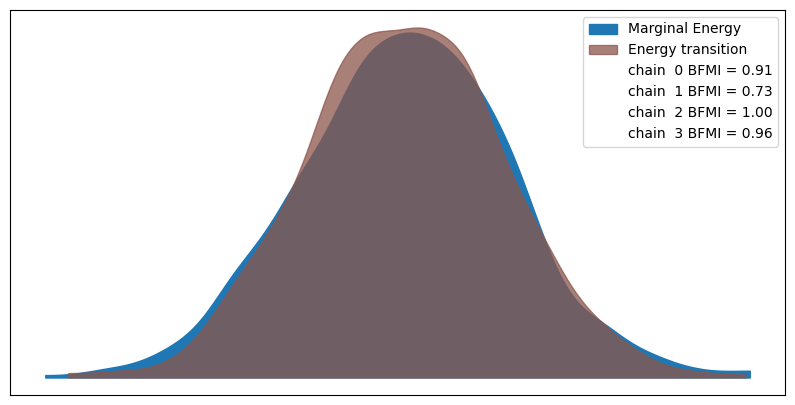

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

az.plot_energy(iData, ax=ax);

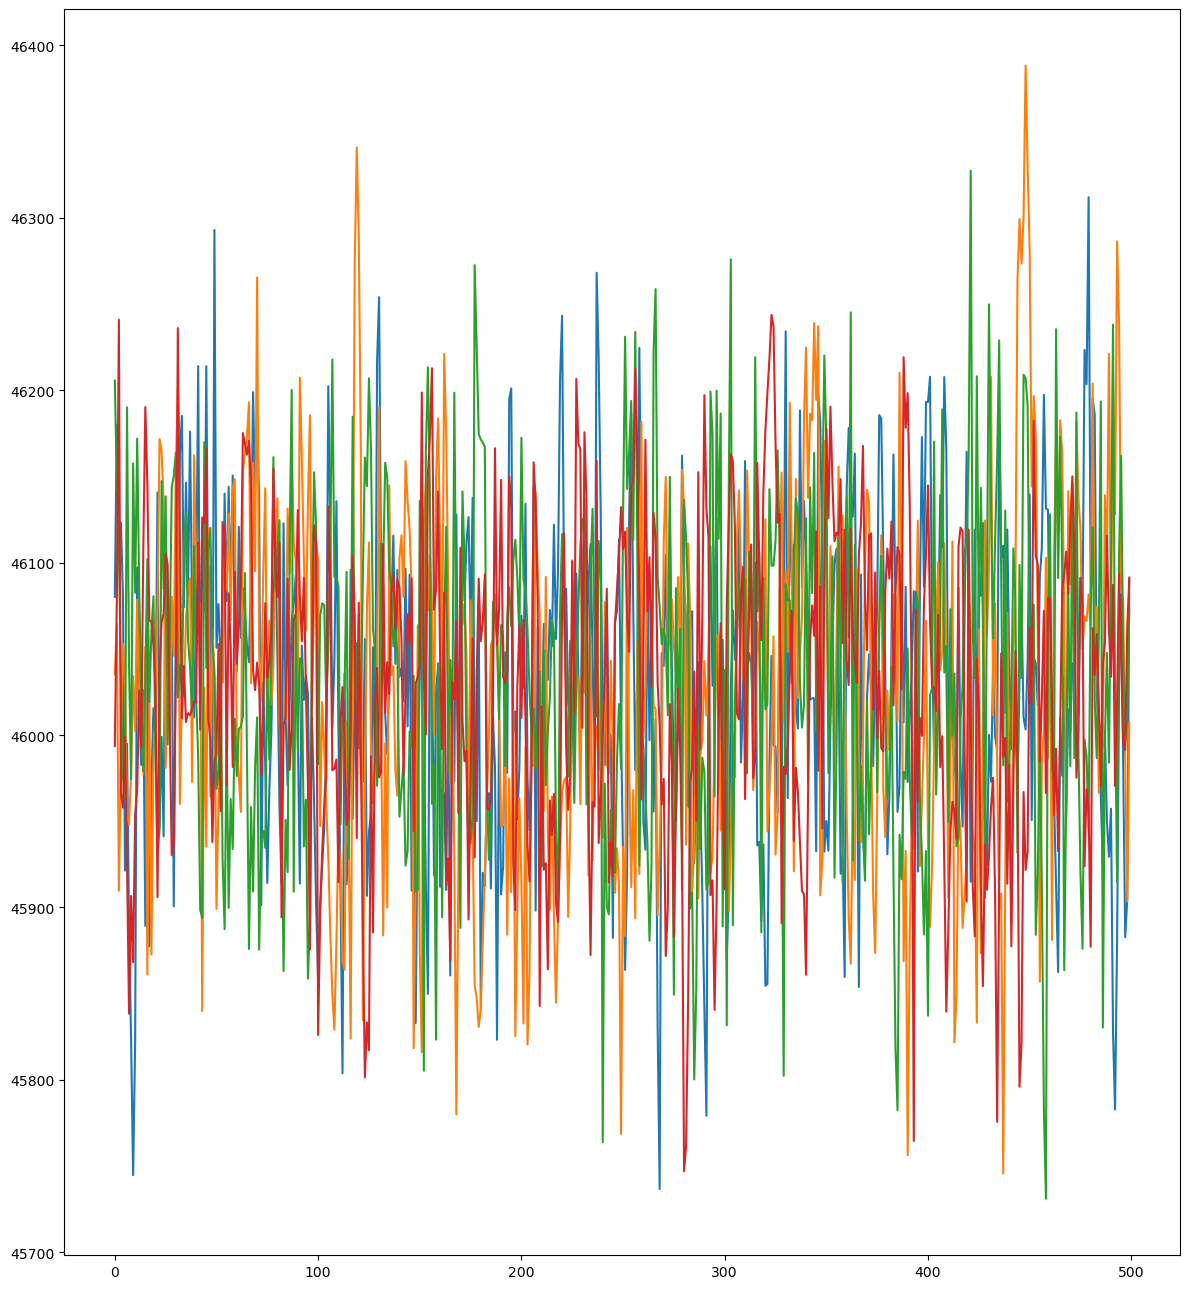

In [ ]:
lp = np.array(iData.sample_stats['lp'])
n_chains = lp.shape[0]

fig, ax = plt.subplots(1, 1, figsize=(12, 1+n_chains*3))

for it in range(n_chains):
    ax.plot(
        np.arange(lp.shape[1]),
        lp[it],
    )

fig.tight_layout(w_pad=1.3)

In [ ]:
rD = np.array(iData.posterior['rD'])
rI = np.array(iData.posterior['rI'])
rF = np.array(iData.posterior['rF'])
nus = np.array(iData.posterior['nu'])
# print(np.mean(nus, axis=1))
# nus = 3*np.ones((2, 10, 5))


In [ ]:
sf = np.array(iData.posterior['s_fac'])
sf.mean(axis=1)

array([[-0.32972901,  1.08393177,  0.35591889],
       [-0.34095634,  1.05338926,  0.32969712],
       [-0.30860907,  1.07667159,  0.36026607],
       [-0.33647689,  1.059054  ,  0.33746064]])

In [ ]:
nus.mean(axis=1)

array([[11.80169035,  3.26148483,  1.48016067],
       [12.32937645,  3.2287726 ,  1.47650288],
       [12.05767025,  3.25125405,  1.46852074],
       [12.01298931,  3.25464095,  1.4723352 ]])

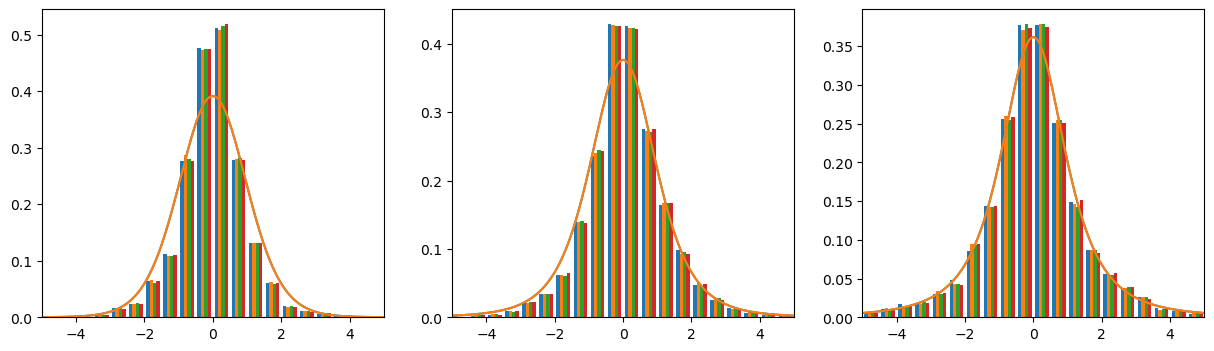

In [ ]:
rs = [
    rD,
    rI,
    rF,
]

fig, axs = plt.subplots(1, len(rs), figsize=(15, 4))

# for it in range(len(rs)):
for it in range(3):
    _, bins, _ = axs[it].hist(
        np.mean(rs[it], axis=1).T,
        bins=np.linspace(-5, 5, 21),
        density=True,
    )
    arr = np.linspace(
        np.min(bins),
        np.max(bins),
        401,
    )
    axs[it].plot(
        arr,
        t.pdf(arr, df=1+np.mean(nus[0, :, it])),
        color='C0',
    )
    axs[it].plot(
        arr,
        t.pdf(arr, df=1+np.mean(nus[1, :, it])),
        color='C1',
    )
    axs[it].set_xlim(-5, 5)

In [ ]:
rNH = np.array(iData.posterior['rNH'])
rSH = np.array(iData.posterior['rSH'])
rGL = np.array(iData.posterior['rGL'])

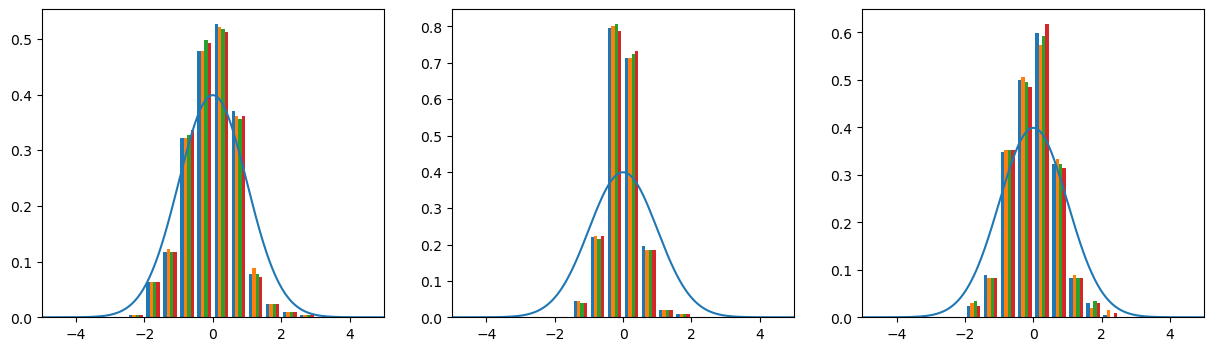

In [ ]:
rs = [
    rNH,
    rSH,
    rGL,
]

fig, axs = plt.subplots(1, len(rs), figsize=(15, 4))

# for it in range(len(rs)):
for it in range(3):
    _, bins, _ = axs[it].hist(
        np.mean(rs[it], axis=1).T,
        bins=np.linspace(-5, 5, 21),
        density=True,
    )
    arr = np.linspace(
        np.min(bins),
        np.max(bins),
        401,
    )
    axs[it].plot(
        arr,
        norm.pdf(arr),
        color='C0',
    )
    axs[it].set_xlim(-5, 5)

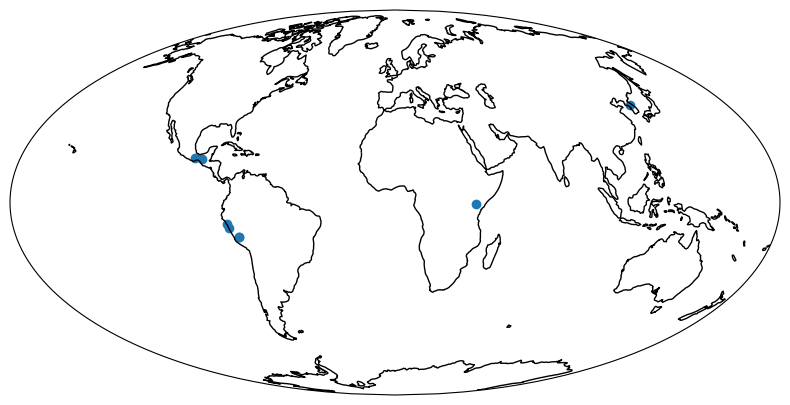

In [ ]:
locs = data.inputs[:, t_inds]
# locs[1][np.argwhere(locs[1] > 180)] -= 360
proj = ccrs.Mollweide()
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': proj}, figsize=(10, 5))

ax.scatter(
    locs[1],
    90-locs[0],
    transform=ccrs.PlateCarree(),
)
ax.set_global()
ax.coastlines()

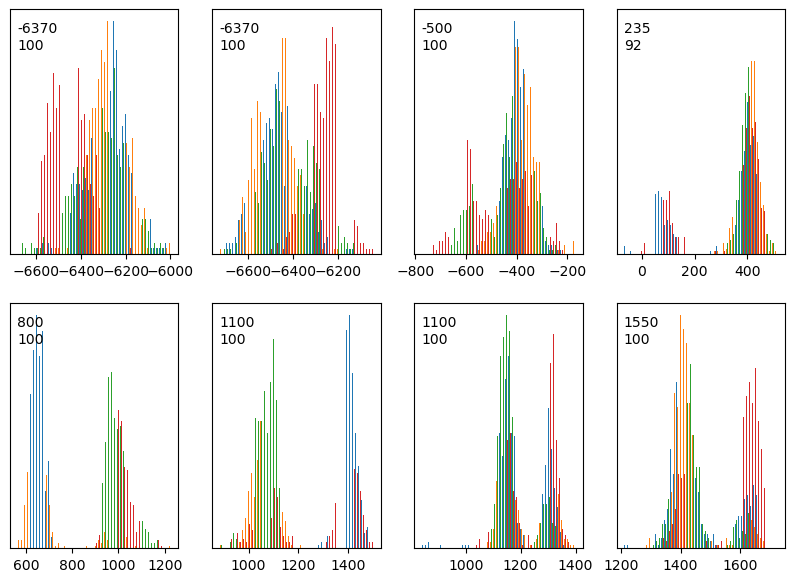

In [ ]:
n_plots = len(t_inds)

if n_plots <= 20:
    if n_plots <= 3:
        n_row = 1
        n_col = n_plots
    elif n_plots <= 6:
        n_row = 2
        n_col = n_plots // 3 + 1
    elif n_plots <= 8:
        n_row = 2
        n_col = 4
    elif n_plots == 9:
        n_row = 2
        n_col = 4
    else:
        n_row = int(np.ceil(n_plots / 4))
        n_col = 4

    fig, axs = plt.subplots(
        n_row, n_col,
        figsize=(10, 1 + 3*n_row),
    )

    for idx in range(axs.size - n_plots):
        axs[n_row-1, -(idx + 1)].axis('off')

    for it, ind in enumerate(t_inds):
        i, j = np.unravel_index(it, axs.shape)

        vals, bins, _ = axs[i, j].hist(
            ts[:, :, ind].T,
            bins=50,
            density=True,
        )
        axs[i, j].set_yticks([])
        axs[i, j].text(
            bins[0], 0.95*np.max(vals),
            f'{z_at[3, ind]:.0f}',
        )
        axs[i, j].text(
            bins[0], 0.88*np.max(vals),
            f'{np.sqrt(data.errs_T_raw)[ind]:.0f}',
        )


In [ ]:
names

['t_cent[20]',
 't_cent[21]',
 't_cent[1858]',
 't_cent[3070]',
 't_cent[4305]',
 't_cent[5081]',
 't_cent[5086]',
 't_cent[6535]',
 'rI[2103]',
 'rI[2687]',
 'rI[2691]',
 'rD[1872]']

In [ ]:
from paleokalmag.data_handling import Data

In [ ]:
dat = Data(rawData)